</center><img src="https://www3.um.edu.uy/logoum.jpg" width=300></center>
<h1 align="center">Introducción a la Ciencia de Datos</h1>
<h2 align="center"> <font color='gray'>Práctico 4: Regresiones y clasificación</font></h2>

</center><img src="images/who.png" width=800></center>

### <font color='289C4E'>Tabla de contenidos<font><a class='anchor' id='inicio'>
- [Importe las librerías necesarias](#0)
- [Utilize una regresión lineal para predecir](#1)
- [Grafique la línea de mejor ajuste](#2)
- [Evalúe el nivel de precisión de nuestra predicción](#3)
- [Caso multivariante](#4)
- [Regresión lineal multivariante extensión](#5)
- [Normalización](#6)
- [Wine dataset](#7)
- [Hyperparameter tunning](#8)
- [Logistic regression](#9)
- [Decision tree classifiers](#10)
    
Al finalizar el práctico usted aprenderá:
- Qué es una regresión lineal.
- Cómo entrenar un modelo lineal.
- Cómo generar predicciones con un modelo lineal.
- Cómo evaluar las predicciones del modelo.
- Extensión al caso multivariante.
- Cómo es afectado un modelo lineal por medio de una normalización.
- Noción de Cross-Validation, Training set, Validation set y Testing set. Parte de teórico.
- Regresión logística para clasificación binaria.
- Árboles de decisión para clasificación de dos o más clases.


<font color='FF1000'> **Nota:** en este práctico no se le dará mayor relevancia a todo lo referente a la validación de modelos. Prácticamente en todo el práctico usted entrenará y evaluará en el conjunto de entrenamiento. Esto se conoce como **validación de resustitución (resubstitution validation)** y no es una práctica frecuente, pues introduce sesgos optimistas en la estimación del rendimiento o performance predictiva del modelo.<font>

### <font color='289C4E'>0) Importe las librerías necesarias<font> <a class='anchor' id='0'></a> [↑](#inicio)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import linear_model, metrics, model_selection
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree

## Qué es una regresión lineal?

Es un modelo que encuentra la mejora línea recta que se ajusta a nuestros datos. Estos modelos predicen con buena exactitud cuando los datos se comportan linealmente.

### Ejemplo

Frecuentemente, se nos presentan una serie de datos $\mathbf{x}$ con el fin de predecir una "respuesta" $\mathbf{y}$. Por ejemplo, podríamos llegar a predecir por medio de una regresión la `nota_de_examen` (variable $\mathbf{y}$) por medio de la variable `horas_de_estudio` (nuestra variable $\mathbf{x}$).

Generemos unos datos de ejemplo y examinemos la relación existente entre $\mathbf{x}$ e $\mathbf{y}$.

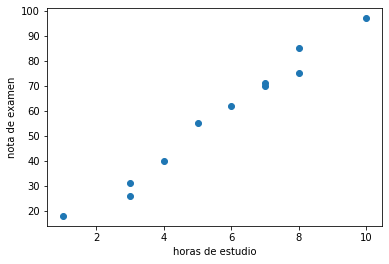

In [2]:
horas_de_estudio = np.array([1, 3, 3, 4, 5, 6, 7, 7, 8, 8, 10])
nota_de_examen = np.array([18, 26, 31, 40, 55, 62, 71, 70, 75, 85, 97])
plt.scatter(horas_de_estudio, nota_de_examen)
plt.xlabel('horas de estudio')
plt.ylabel('nota de examen')
plt.show()

### Modelo lineal

#### Hipótesis

Un modelo lineal establece una "hipótesis" sobre la verdadera naturaleza de la función subyacente. Es decir, esta hipótesis es que se asume que los datos se comportan de manera lineal. En nuestro ejemplo, al usar un modelo lineal para predecir la nota de examen a partir de las horas de estudio estamos asumiendo que la nota de examen puede ser expresada o predicha por medio de una función lineal de las horas de estudio. 

Se expresa esta hipótesis en el caso univariante por medio de la función:

$$h(x) = a.x + b$$

En otras palabras:

$$nota\_de\_examen(horas\_de\_estudio) = coeficiente * (horas\_de\_estudio) + constante $$

Nuestro simple ejemplo es un ejemplo de **regresión univariante**, es decir la variable que queremos predecir es predicha por solo una variable o atributo. Si tenemos más de una variable para predecir la variable objetivo entonces estamos en un caso de **regresión multivariante**. En este caso la fórmula sería:

$$h_\theta(\mathbf{X}) = \mathbf{\theta}^\top \mathbf{X} + \mathbf{b} $$

En este caso más general, lo que en la regresión univariante era el **coeficiente "a"** (un número) ahora en la regresión multivariante pasa a ser un **vector de coeficientes "a"**. Asimismo, lo que en la regresión univariante era el **vector de puntos "x"** (un vector con nuestra variable) ahora en la regresión multivariante pasa a ser una **matriz de puntos "X"**.

In [ ]:
### Univariante
a = 54
b = 3
x = [4,5,6]

### Multivariante
tita = [1,2,3]
b = [3 ,5 ,6]
x = [4,5,6]

1*4+2*5+3*6

### <font color='289C4E'>1) Utilize una regresión lineal para predecir<font> <a class='anchor' id='1'></a> [↑](#inicio) 
    
a) Prediga la nota de examen utilizando las horas de estudio por medio de una regresión lineal. Para eso:
1. Defina un modelo, es decir, asígnele a una variable el modelo.
2. Ajuste el modelo. Para eso se utiliza la función **.fit()**. Ajustar/Entrenar/Fit es la jerga utilizada en Machine Learning para referirse al hecho de aprender los parámetros del modelo.

b) Conteste luego en un markdown las siguientes preguntas:
1. Utilize el método **.coef_** para obtener el primer parámetro de la regresión. Qué es este parámetro? Cuál es su valor? Qué nos indica?
2. Utilize el método **.intercept_** para obtener el segundo parámetro de la regresión. Qué es este parámetro? Cuál es su valor? Qué nos indica?

In [ ]:
mi_modelo_lineal.fit(X)
mi_modelo_lineal.coef_

### <font color='289C4E'>2) Grafique la línea de mejor ajuste<font> <a class='anchor' id='2'></a> [↑](#inicio)
    
- Grafique la línea de mejor ajuste utilizando la función [plt.plot()](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)
- Grafique los datos utilizando la función [plt.scatter()](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter)

### <font color='289C4E'>3) Evalúe el nivel de precisión de nuestra predicción<font> <a class='anchor' id='3'></a> [↑](#inicio)
  
Luego de generar predicciones es de nuestro interés evaluar el nivel de precisión de las mismas. Esto tiene varios fines. El primero por supuesto es evaluar qué tan bueno es nuestro modelo predictivo. Segundo, nos permite comparar modelos y ver cuál desempeña mejor. Finalmente, nos permite afinar nuestros híper-parámetros (hyperparameter tunning). 

Existen numerosas maneras de evaluar nuestros modelos. La evaluación siempre se mide por medio de métricas. Éstas son fórmulas matemáticas con fines específicos que intentan expresar una característica del modelo. Por ejemplo, una métrica muy utilizada es **Mean Absolute Error (MAE)**. Ésta mide la diferencia absoluta entre nuestra predicción y el valor real, en sí es una medida de precisión:

$$ MAE = \frac{\sum_{i=1}^{n}|y - \hat{y}|}{n} $$

Otra métrica muy utilizada es **Root Mean Squared Error (RMSE)**. Al igual que MAE, es una medida de precisión, pero ésta penaliza más fuertemente los errores más grandes. En definitiva, si utilizamos ésta métrica para evaluar nuestro modelo obtendríamos modelos más robustos. Su fórmula es:

$$ RMSE = \sqrt{\frac{\sum_{i=1}^{n} (y - \hat{y})^{2}}{n}} $$

1. Define los vectores (listas) `y_true` (valores reales) y `y_pred` (valores predichos). Para obtener `y_pred` deberá usar el método **model.predict()**. Esta se aplica al modelo, es decir, una vez que el modelo ha sido "entrenado" esta es la función utilizada para generar las predicciones.
2. Calcule el MAE utilizando la función [sklearn.metrics.mean_absolute_error()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error)
3. Calcule el RMSE utilizando la función [sklearn.metrics.mean_squared_error()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error), deberá realizarle la raíz cuadrada al valor obtenido.

### <font color='289C4E'>4) Caso multivariante<font> <a class='anchor' id='3'></a> [↑](#inicio)

En general, tendremos $n$ registros/filas y $p$ atributos/columnas, resultando en una matriz/tabla que tendrá $n$ filas y $p$ columnas.

Volviendo al ejemplo del examen, si añadimos un nuevo atributo `horas_de_sueño` (la noche antes del examen) tendremos 2 atributos. Supongamos que tenemos 4 data points, entonces un ejemplo de nuestra matriz sería:

$$
\left[
  \begin{array}{ccc}
    y_{1} & y_{2} & y_{3} & y_{4}\\
  \end{array}
\right]
=
\left[
  \begin{array}{ccc}
    a_{11}\\
    a_{21}\\
  \end{array}
\right]^{T}
\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & x_{14}\\
    x_{21} & x_{22} & x_{23} & x_{24}\\
\end{bmatrix}
+
\left[
  \begin{array}{ccc}
    b_{1}\\
  \end{array}
\right]
$$

A continuación, se ha añadido una columna más llamada `horas_de_sueño`. Entrene un modelo de regresión lineal y obtenga los coeficientes. Interprete cada uno. 

**Nota:** puede ser de utilidad imprimir las dimensiones. Si el array no tiene las dimensiones correctas no podrá ser utilizado para entrenar el modelo.

In [3]:
X = np.array([[1, 3, 3, 4, 5, 6, 7, 7, 8, 8, 10],
             [2, 2.5, 3, 4, 6, 6.5, 7.2, 7.5, 8, 8.5, 10]])
y = np.array([18, 26, 31, 40, 55, 62, 71, 70, 75, 85, 97])

### <font color='289C4E'>5) Regresión lineal multivariante extensión<font> <a class='anchor' id='5'></a> [↑](#inicio)

1. Cargue el CSV **data**. 
2. Estudie las correlaciones entre las variables existentes utilizando [sns.pairplot()](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot). Están bien correlacionadas?
3. Entrene un modelo lineal (no tenga en cuenta la variable `state` para el entrenamiento) y evalúe el ajuste utilizando RMSE.

### <font color='289C4E'>6) Normalización<font> <a class='anchor' id='6'></a> [↑](#inicio)

1. Normalize las columnas x1, x2, x3 usando [MinMaxScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). Entrene un modelo lineal.
2. Qué ha sucedido con los coeficientes de la regresión? Tiene sentido el cambio? 
3. Evalúe el ajuste utilizando RMSE. Qué conclusión puede sacar?

## <font color='000000'>Training and testing<font>

Hasta ahora hemos simplemente entrenado modelos con el 100% de los datos que disponemos. En la práctica esto nunca se hace, pues el objetivo de un modelo es generalizar más allá de los datos de entrenamiento. Usualmente dado un conjunto de datos se divide éste en tres datasets: **training dataset, validation dataset y testing dataset**. 

En este curso, no cubriremos los conceptos de **cross-validation** (validación cruzada), ya que es un tema central de Machine Learning. Sin embargo, se dará una intuición del concepto ya que es central y vital en cualquier proyecto que involucre la Ciencia de Datos.

Dada una serie de datos, lo común es dividir los datos disponibles en distintos conjuntos para **entrenar** un modelo, **validar** y **testear** el mismo. Pondremos una analogía para ilustrar el concepto de validación cruzada. Suponga que usted tiene muy poco tiempo para preparar un examen y posee una serie de examenes viejos con soluciones. Entonces usted decide:
- Estudiar el 70% de los exámenes mirando las soluciones.
- Hacer 20% de los restantes sin mirar inicialmente las soluciones. Luego, mirará las soluciones para refinarse, estudiando qué errores ha cometido con más frecuencia y usted estará mejor preparado.
- Hacer el 10% de los restantes para verdaderamente evaluar sus conocimientos. Con este 10% usted obtendrá una idea real de cuál será su performance el día del exámen.

El 70% de los exámenes corresponderían a su **training dataset**, es decir, usted se entrenó estudiando ese 70%. Los modelos de Machine Learning **ajustan sus parámetros internos** con este dataset. Luego, el 20% de los exámenes es su **validation dataset**, es decir, refinará sus conocimientos con este dataset. En machine learning se usa este dataset para **refinar los híper-parámetros (hyperparameter tunning)**. Por último, el 10% final corresponde a su **testing dataset** usted **evaluará la performance** con este dataset.

Este proceso conocido como cross-validation intenta evitar principalmente dos problemas: **underfitting y overfitting**. Siguiendo con la analogía, **underfitting** sería la situación en la que usted se entrena con pocos exámenes, estudiando y entendiendo poco, por lo que a la hora de dar el examen tendrá pésimos resultados. Por otro lado, **overfitting** sería la situación en la que usted se ha memorizado los exámenes con sus soluciones. Si tiene suerte y le toca un exámen muy parecido a los que ha visto tendrá una performance excelente, pero si apenas lo mueven de sus conocimientos tendrá una performance horrible.

En la práctica, el **underfitting** suele producirse cuando:
- Se entrena un modelo muy sencillo, que no es capaz de captar la complejidad subyacente de nuestros datos.
- Se entrena datos que no cumplen con los supuestos del modelo.
- Se entrena con muy pocos datos.

En la práctica, el **overfitting** suele producirse cuando:
- Se entrena un modelo muy complejo.
- La proporción de training es sumamente mayor que la de validation y testing, memorizando los datos.
- Se entrena con muy pocos datos.

Lo que se busca es lo que se conoce como **"just right"**. Es decir, que el modelo verdaderamente aprenda, que sea robusto y esté preparado para enfrentarse a lo desconocido. En el futuro, usted aprenderá como se relacionan estos fenómenos con los conceptos de **sesgo y varianza** pero en este curso se brinda una mera intuición.

### <font color='289C4E'>7) Wine dataset<font> <a class='anchor' id='7'></a> [↑](#inicio)
    
Usted es un vitivinicultor con muchos años de experiencia. Sin embargo, para no quedar atrás con la competencia decide utilizar data science para además de basarse en su experiencia basarse en datos. A lo largo de los años a juntado información de distintas características de sus vinos y le ha asignado un nivel de calidad a cada uno. Desea entrenar un modelo lineal para predecir la calidad de sus vinos conocidas sus características.

Para eso:
1. Divida el dataset en:
    - **X**, el dataset que contiene las columnas que utilizará para predecir la calidad del vino.
    - **y**, la columna objetivo, es decir, la columna a predecir.
2. Utilize la función [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) para obtener los datasets **X_train, X_test, y_train, y_test**. Para eso:
    - Configure el parámetro **train_size** a 0.8
    - Configure el parámetro **random_state** a 27 (para que su experimento sea reproducible).
3. Imprima las dimensiones de los 4 datasets para corroborar que estén bien.
4. Entrene el modelo lineal. 
5. Evalúe el modelo usando MAE.

In [5]:
wine = pd.read_csv('./data/wine.csv', sep=';')
display(wine.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### <font color='289C4E'>8) Hyperparameter tunning<font> <a class='anchor' id='8'></a> [↑](#inicio)
    
En el mundo de Machine Learning, es tomado como una regla general el hecho de tomar un split de 80% para training y 20% para testing. Esta regla surge del principio de Pareto. Sin embargo, se ha demostrado empíricamente que a medida que el volumen de datos crece esto deja de ser cierto y en **deep learning** llegan a tomarse splits de 99% y 1%. 

Al ser su volumen de datos es extremadamente bajo (~1600 registros) sería entendible regirse por el principio de Pareto. De todos modos, usted quiere sacar el mayor jugo a la performance del modelo y quiere evaluar distintos splits.

Para eso:
1. Repita mediante un loop el proceso anterior, guardando en una lista llamada `split` el tamaño del split de entrenamiento y en otra lista llamada `metric` el resultado de la métrica para ese split. Deberá probar desde un `training_size` de **30%** a un `training_size` de **95%** tomando incrementos de **5%** en cada iteración.
2. Grafique estas dos variables para determinar visualmente el mejor split.
3. Conteste:
    - Cuál es el mejor split?
    - Qué fenómeno ocurre para el menor split?
    - Qué fenómeno ocurre para el mayor split?

### <font color='289C4E'>9) Logistic regression<font> <a class='anchor' id='9'></a> [↑](#inicio)
    
La regresión logística es un modelo simple utilizado en problemas de clasificación binaria. Anteriormente, hemos visto que la regresión lineal se utilizaba para predecir una variable continua. En este caso, la regresión logística es utilizada para predecir una variable binaria, es decir, dos posibles resultados de una variable (0 o 1) a partir de un conjunto de variables, las cuales pueden ser tanto continuas como discretas. 

Mientras que la regresión lineal buscaba la línea de mejor ajuste minimizando $R^2$, la regresión logística busca la mejor función logística que maximiza la máxima verosimilitud (Maximum likelihood estimation). 

En el siguiente ejemplo, usted dispone de un dataset con registros históricos de estudiantes que han aplicado a distintas universidades. Este dataset contiene algunos datos como los puntajes de ciertos exámenes y la chance de ser admitido en una determinada universidad.

Usted quiere saber si entrará o no a una universidad particular. Para eso usted considera que si la chance de admisión es superior a 80% usted definitivamente entrará a la universidad y si es menor no entrará.

Para eso decide entrenar un modelo de regresión logística:
1. Divida el dataset en:
    - **X**, el dataset que contiene las columnas que utilizará para predecir si entrará o no.
    - **y**, la columna objetivo, es decir, la columna a predecir.
2. Convierta la columna objetivo de continua a binaria.
3. Divida sus datasets en training y testing tomando un split de 80% y un `random_state` = 27 para reproducibilidad.
4. Al ser un problema de clasificación no es posible evaluar la performance del modelo mediante MAE o RMSE. Evalúe la performance usando accuracy, precision, recall y F1.
5. Grafique la [matriz de confusión](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) usando [sns.heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

### <font color='289C4E'>10) Decision tree classifiers<font> <a class='anchor' id='10'></a> [↑](#inicio)

Los árboles de decisión son frecuentemente utilizados en problemas de clasificación binaria y discreta. Éstos toman decisiones hasta minimizar lo máximo posible métricas como la [impureza de Gini](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity) o la [entropía de la información](https://en.wikipedia.org/wiki/Entropy_(information_theory)) en las hojas (nodos terminales). Los árboles de decisión tienen varios híper-parámetros, los más utilizados son:
- `métrica:` qué métrica utilizar en los splits.
- `profundidad:` cuántos nodos padres hay entre el nodo más hijo y el primer nodo.

En el siguiente ejemplo, usted utilizará un dataset creado para este curso que contiene atributos de los personajes del clásico juego ["Guess Who?"](https://en.wikipedia.org/wiki/Guess_Who%3F). El árbol de decisión se entrenará con este dataset, de manera que aprenda a clasificar quién es quién.
    
**Nota:** en este ejemplo no dividiremos en train y test pues carece de sentido.

Para esto:
1. Cargue el CSV que contiene los personajes del juego y sus atributos.
2. Separe el dataset de manera que:
    - X sean las variables de entrenamiento.
    - y sea la variable objetivo.
3. Entrene el [árbol de decisión](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
4. Grafique el árbol de decisión usando [plot_tree()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html). Establezca los parámetros `feature_names` y `class_names`. Se recomienda agregar figsize muy grande para visualizar bien la imágen.
5. Utilize el árbol para predecir el registro `prediction`.

In [ ]:
prediction = [0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0]